In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Low Pass Filter

In [2]:
def padit(img, filt):
    fils = filt.shape
    return np.pad(img, ((fils[0]//2, fils[0]//2), (fils[1]//2, fils[1]//2), (0,0)), "edge")
#     return np.pad(img, ((1,1),(1,1),(0,0)), "edge")

In [3]:
def calc(filt, seg):
    return np.sum(filt * seg)

In [4]:
def filtering(img, filt, scaling_factor):
    dim = img.shape
    fils = filt.shape
    b = fils[0]
    l = fils[1]
    
    test = np.pad(img, ((b//2, b//2), (l//2, l//2), (0,0)), "edge")
#     scaling_factor = l*b
#     x = 1
#     y = 1
#     test = padit(img,filt)
    for i in range(dim[0]):
        for j in range(dim[1]):
            for k in range(dim[2]):
                seg = test[i:i+b, j:j+l, k]
                
                v = np.sum(filt * seg) // scaling_factor
                
                if v < 0:
                    img[i][j][k] = 0
                elif v > 255:
                    img[i][j][k] = 255
                else:
                    img[i][j][k] = v
    
    return img

In [5]:
def switchcolor(img):
    img = np.array(img)
    img[:,:,0],img[:,:,2] = np.array(img[:,:,2]), np.array(img[:,:,0])
    return img

In [6]:
def savetoimage(data, filename):
    cv2.imwrite(filename, switchcolor(data), [0])

In [15]:
filt = np.array([[ 1, 1, 1, 1, 1],
                 [ 1, 1, 1, 1, 1],
                 [ 1, 1, 1, 1, 1],
                 [ 1, 1, 1, 1, 1],
                 [ 1, 1, 1, 1, 1]])
filt.shape

(5, 5)

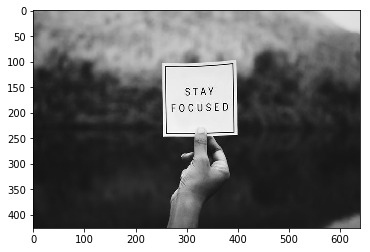

In [16]:
img = cv2.imread('test3.jpeg')
img = np.array(img)
img = switchcolor(img)
plt.imshow(img)

# Low Pass

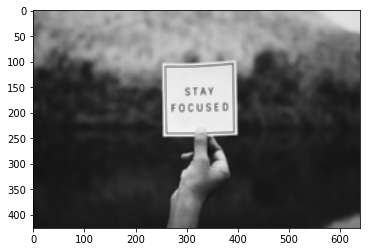

In [17]:
filtered = filtering(img, filt, 25)

plt.imshow(filtered)

In [18]:
savetoimage(filtered,"low_filter.png")

# High Pass

In [19]:
highfilt = np.array([[-1,-1,-1],
                     [-1, 8,-1],
                     [-1,-1,-1]])

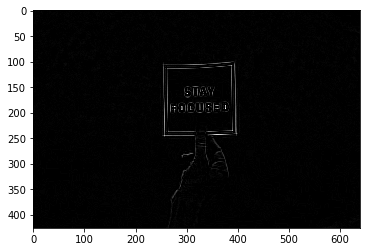

In [20]:
filtered = filtering(img, highfilt, 1)

plt.imshow(filtered)